# Testing my ICA algorithms

In [73]:
import numpy as np
from scipy.signal import square, sawtooth
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

%matplotlib inline

from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

In [56]:
x = np.linspace(-10, 10, 1000)
source1 = np.sin(x)
source2 = square(x)
source3 = sawtooth(x)

sources = np.array([source1, source2, source3])

A = np.random.random(size =  (3,3))
mixtures = np.dot(A, sources)
print(A)

[[ 0.15397473  0.95771159  0.24821105]
 [ 0.71570468  0.67430396  0.72837583]
 [ 0.62870116  0.6099606   0.87081852]]


## NPCA-RLS

In [57]:
estimates, W = NPCA_RLS(mixtures, runs = 20)

C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


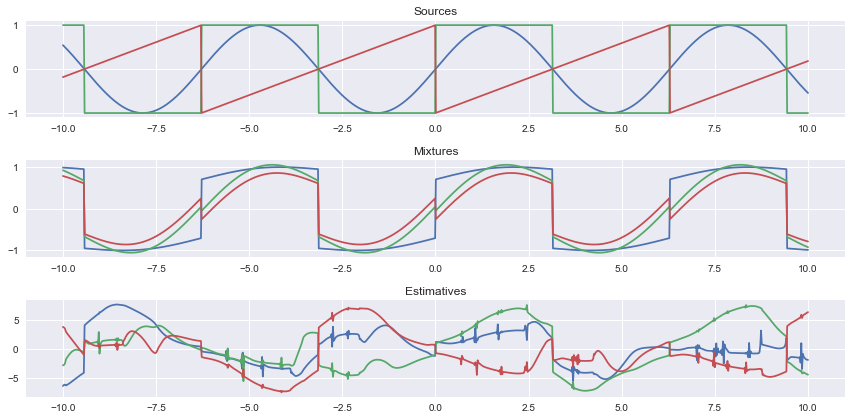

In [58]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

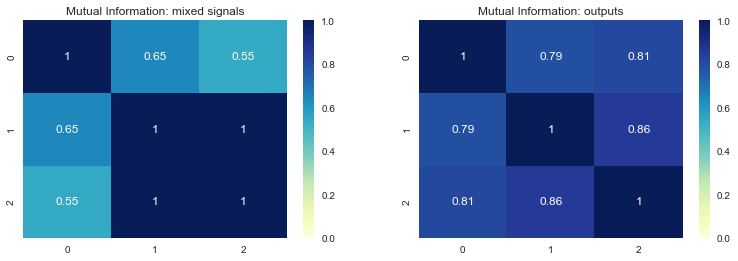

In [59]:
plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedback

In [60]:
estimates, W = cichocki_Feedback(mixtures, runs= 2)

C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


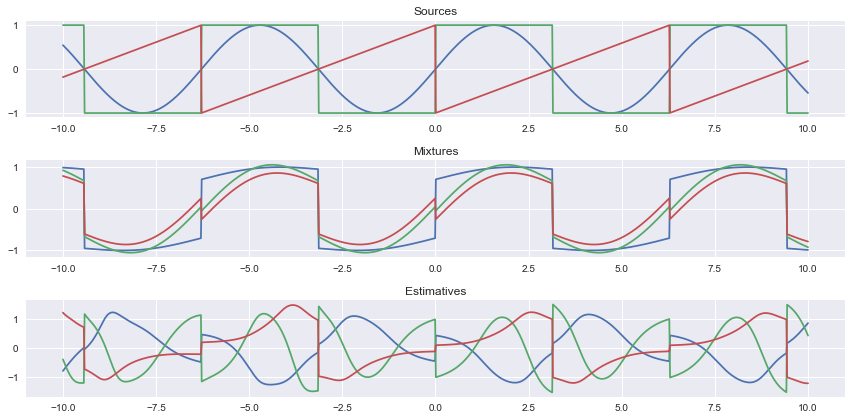

In [61]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

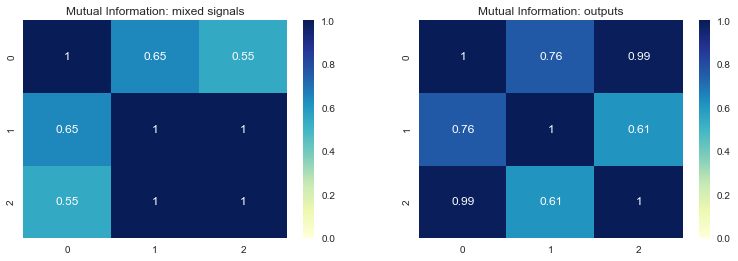

In [62]:
plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedforward

In [68]:
estimates, W = cichocki_Feedforward(mixtures, runs= 2, learningRate = 1e-6)

C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


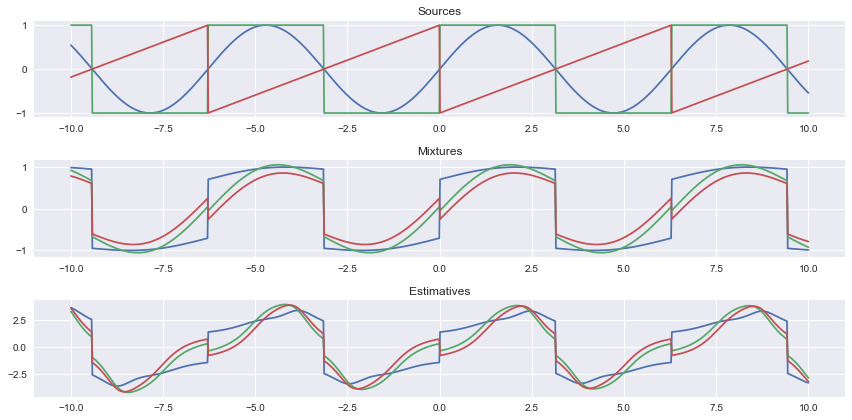

In [69]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

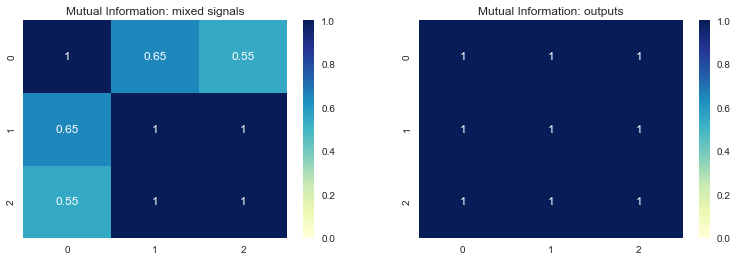

In [70]:
plot_MutualInformation(mixtures, estimates)